## A/B Testing & Next Steps

In [2]:
import pandas as pd #pandas is a library for data manipulation and analysis
pd.set_option('display.max_colwidth', None) #set the maximum width of columns to unlimited. This will prevent long strings from being truncated.

import matplotlib.pyplot as plt #matplotlib.pyplot is a plotting library used for 2D graphics in python programming language. It can be used in python scripts, shell, web application servers and other graphical user interface toolkits.

import numpy as np #NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

from sklearn.feature_extraction.text import CountVectorizer #CountVectorizer is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text. It is part of the sklearn library.

from nltk import corpus #Natural Language Toolkit’s (NLTK) corpus package defines a collection of corpus reader classes, which can be used to access the contents of a diverse set of corpora.

import re #re is the standard library for regular expressions in Python

import ast #The ast module helps Python applications to process trees of the Python abstract syntax grammar

import statsmodels.api as sm #statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration.

from sklearn.preprocessing import StandardScaler #StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. 

from sklearn.metrics.pairwise import cosine_similarity #Cosine similarity is a measure of similarity between two non-zero vectors of an inner product space. It is defined to equal the cosine of the angle between them.

from sklearn import datasets, linear_model #datasets and linear_model are both modules of the sklearn library. datasets provides pre-loaded datasets for testing and experimenting with different algorithms. linear_model provides different linear models for regression, classification and other tasks.

import pickle #pickle module implements binary protocols for serializing and de-serializing a Python object structure.


Content-based recommendation systems work by using specific features of an item to recommend additional items with similar properties. In the context of your recipe recommendation system, using the names of the recipes as a basis for generating recommendations can be quite useful. Here's a more detailed breakdown:

Feature Extraction: The first step in building a content-based recommendation system is feature extraction. In this case, we can treat each recipe name as a document and apply natural language processing techniques such as tokenization, stemming, and vectorization (such as TF-IDF or count vectorization) to convert these names into numerical representations that can be processed by the recommendation algorithm.

Similarity Computation: Once the recipes' names are converted into numerical form, the recommendation system can compute the similarity between different recipes based on these representations. There are various metrics available for computing the similarity like cosine similarity, Euclidean distance, Jaccard similarity, etc. The key idea is that recipes with similar names are assumed to be more similar in terms of their content, ingredients, or style, and therefore, if a user likes a certain recipe, they are more likely to enjoy recipes with similar names.

Recommendation Generation: Based on these similarity scores, when a user interacts with a particular recipe (for instance, by rating it highly or viewing it multiple times), the system can then recommend other recipes with similar names.

Model Evaluation and Refinement: It's crucial to evaluate the recommendation system using appropriate metrics like user feedback. Based on this evaluation, the model can be refined and improved over time.

This approach has the advantage of not requiring any user interaction history, which makes it effective for new users (solving the cold start problem). However, it relies heavily on the assumption that recipes with similar names are indeed similar in content, which might not always be the case. Thus, it's often beneficial to combine content-based approaches with other recommendation strategies, such as collaborative filtering, for more robust and diversified recommendations.

In [21]:
#importing libraries
import pandas as pd #pandas takes care of all file handling
from bokeh.models import BoxAnnotation #bokeh is a plot library and boxannotation will help with aspects of the graph
from bokeh.plotting import figure, show  #help with shape and view aspect of the graph
from bokeh.io import output_notebook #gives it the "in notebook" display rather than an HTML display
from bokeh.models import ColumnDataSource, HoverTool #added tools for better features of the graph

output_notebook()

#Data setup
data = {
    'Week': ['May 1-14', 'May 15-Jun 4', 'Jun 5-19', 'Jun 20-23', 'Jun 24-25'],
    'Task': [
        'Data processing',
        'Key features & indicators',
        'Model training & evaluation',
        'A/b testing, Model refinement',
        'Next Steps'
    ],
    'Start': ['2023-05-01', '2023-05-15', '2023-06-05', '2023-06-20', '2023-06-24'],
    'End': ['2023-05-14', '2023-06-04', '2023-06-19', '2023-06-23', '2023-06-25']
}

df = pd.DataFrame(data)
df['Start'] = pd.to_datetime(df['Start'])
df['End'] = pd.to_datetime(df['End'])

#Column data source creation
source = ColumnDataSource(df)

#colors for each task
colors = ['gray', 'green', 'red', 'purple', 'orange']

#figure creation
p = figure(title="CAPSTONE Schedule", x_axis_type='datetime', y_range=df['Task'], width=800, height=400, tools="")

for indx, task in enumerate(df['Task']):
    task_source = ColumnDataSource(df[df['Task'] == task])
    p.hbar(y='Task', height=0.9, left='Start', right='End', color=colors[indx], source=task_source)

#shading the passive and active intervals
box = BoxAnnotation(left=pd.to_datetime('2023-05-01'), right=pd.to_datetime('2023-05-14'), fill_color='lightgrey', fill_alpha=0.1)
box2 = BoxAnnotation(left=pd.to_datetime('2023-05-15'), right=pd.to_datetime('2023-06-04'), fill_color='lightgrey', fill_alpha=0.1)
box3 = BoxAnnotation(left=pd.to_datetime('2023-06-05'), right=pd.to_datetime('2023-06-19'), fill_color='lightgrey', fill_alpha=0.1)
box4 = BoxAnnotation(left=pd.to_datetime('2023-06-20'), right=pd.to_datetime('2023-06-26'), fill_color='lightgreen', fill_alpha=0.1)

#displaying them
p.add_layout(box)
p.add_layout(box2)
p.add_layout(box3)
p.add_layout(box4)

#this allows the cursor to hover over it
hover = HoverTool(tooltips=[("Task", "@Task"), ("Start", "@Start{%F}"), ("End", "@End{%F}")], formatters={"@Start": "datetime", "@End": "datetime"})
p.add_tools(hover)

#these are the labels
p.xaxis.axis_label = "Date"
p.yaxis.axis_label = "Task"
p.ygrid.grid_line_color = None
p.xaxis.major_label_orientation = 1

#shows the grapha
show(p)


Loading BokehJS ...

## Table of Contents

<a id="0"></a> <br>
0.3 [User Interactions - Hit Rate](#0.3)

0.4 [Next Steps](#0.4)

In [33]:
import pandas as pd

#Model 1 recommendation data

data = {
    'recipe': [23462, 58914, 48790, 28789, 44084, 42911, 34232, 48933, 10454, 19703, 7786, 21911, 49659, 2403, 30845, 17202, 33027, 50269, 23476, 24976, 11292, 52919, 58328, 19194, 5120, 12418, 33329, 43823, 4737, 9581, 37350, 9798, 1097, 47214, 26943, 58739, 20848, 11067, 7532, 22074],
    'name': ['chicken pasta', 'chicken pasta', 'lemon pasta', 'vegetarian pasta e fagioli pasta and beans', 'pasta and zucchini', 'baked pasta sauce', 'garlic pasta salad', 'four cheese pasta casserole', 'spicy sonora chicken pasta', 'chicken pasta bake', 'lemon pasta salad', 'chicken and mushroom pasta', 'pasta with avocado', 'gramps italian pasta salad', 'pasta bean soup', 'baked pasta with spinach', 'pasta and sausage soup', 'pasta and sausage soup', 'pasta and sausage soup', 'teriyaki pasta', 'pizza pasta pie', 'macaroni pasta salad', 'broccoli garlic pasta for one', 'mushroom pasta sauce', 'pasta puttanesca the madame s pasta', 'easy cheesy pasta', 'easy cheesy pasta', 'perfect pasta salad', 'vegetable pasta sauce', 'southwest pasta', 'pasta with bacon and spinach', 'simple pasta casserole', 'pasta house pasta con broccoli actual recipe', 'blue cheese pasta', 'blue cheese pasta', 'tomato mushroom pasta', 'herbed chicken pasta', 'awesome pasta sauce', 'baked chicken parmesan over pasta', 'caesar chicken pasta'],
    'similarity': [0.845372, 0.845372, 0.710148, 0.650005, 0.629255, 0.629239, 0.626941, 0.625975, 0.621849, 0.616881, 0.615393, 0.600587, 0.597123, 0.593751, 0.587455, 0.584227, 0.581205, 0.581205, 0.581205, 0.575936, 0.573655, 0.572702, 0.572413, 0.569752, 0.565307, 0.558022, 0.558022, 0.557915, 0.556282, 0.551837, 0.550668, 0.550656, 0.546067, 0.539461, 0.539461, 0.538426, 0.536441, 0.535383, 0.534401, 0.533117],
    'count': [943, 2541, 581, 1330, 838, 514, 1170, 1883, 2774, 515, 400, 1452, 514, 3811, 7395, 1409, 759, 1170, 1067, 1271, 311, 617, 2081, 1452, 1330, 2081, 876, 2507, 818, 835, 337, 7395, 1401, 2282, 352, 1077, 442, 845, 1649, 433]}


In [36]:
pd.DataFrame(data)

,recipe,name,similarity,count
0,23462,chicken pasta,0.845372,943
1,58914,chicken pasta,0.845372,2541
2,48790,lemon pasta,0.710148,581
3,28789,vegetarian pasta e fagioli pasta and beans,0.650005,1330
4,44084,pasta and zucchini,0.629255,838
5,42911,baked pasta sauce,0.629239,514
6,34232,garlic pasta salad,0.626941,1170
7,48933,four cheese pasta casserole,0.625975,1883
8,10454,spicy sonora chicken pasta,0.621849,2774
9,19703,chicken pasta bake,0.616881,515


In [38]:
import pandas as pd

#Model 2 recommendation data
data2 = {
    'rank': [0, 1, 2, 5, 6, 7, 8, 11, 12, 13, 14, 22, 24, 26, 28, 29, 30, 31, 32, 34, 35, 36, 37, 41, 44, 46, 47, 48],
    'name': ['herb crusted rack of lamb', 'herb roasted idaho potato fries', 'roasted rosemary potatoes with garlic', 'bbq or roasted spiced leg of lamb', 'rosemary roasted new potatoes', 'balsamic pork tenderloin', 'rosemary garlic oven fries', 'leg of lamb boneless greek style', 'brined whole chicken with lemon and thyme', 'roasted bone in chicken breasts with herbs', 'tsr version of carrabba s bread dipping spice by todd wilbur', 'roast leg of lamb', 'roasted rosemary potatoes', 'roasted greek potatoes', 'tuscan lemon chicken with warm bean salad', 'grilled lamb ribs agnello a scottadito', 'herbed bistro chicken', 'roast pork loin with garlic rosemary thyme', 'bread dipping olive oil similar to bravo', 'pop pop s roast leg of lamb', 'grill pork with rosemary and lavender', 'grilled asparagus with garlic and fresh lemon', 'roasted brussels sprouts', 'cross rib roast', 'roasted potatoes with rosemary and sea salt', 'foil wrapped side of salmon with lemon and rosemary', 'baked herbed potatoes', 'lemon dill rice']
}

model2_df = pd.DataFrame(data2)

model2_df


,rank,name
0,0,herb crusted rack of lamb
1,1,herb roasted idaho potato fries
2,2,roasted rosemary potatoes with garlic
3,5,bbq or roasted spiced leg of lamb
4,6,rosemary roasted new potatoes
5,7,balsamic pork tenderloin
6,8,rosemary garlic oven fries
7,11,leg of lamb boneless greek style
8,12,brined whole chicken with lemon and thyme
9,13,roasted bone in chicken breasts with herbs


## User Interactions - Hit rate

This is an example of the repeated user feedback I received this week.  limited to top 5 users who provided feedback for 2 models regarding the word pasta.  A common word was an intentional choice its very popular and helps to create a sense of my audience as more user behaviour gets incorporated.

In [39]:
import pandas as pd

#all the user inputs 

data = {
    'Model': [1, 2, 1, 2, 1, 2, 1, 2, 1, 2],
    'User': ['User1', 'User1', 'User2', 'User2', 'User3', 'User3', 'User4', 'User4', 'User5', 'User5'],
    'Word': ['Pasta', 'Pasta', 'Pasta', 'Pasta', 'Pasta', 'Pasta', 'Pasta', 'Pasta', 'Pasta', 'Pasta'],
    'New': [2, 5, 1, 0, 1, 0, 0, 2, 1, 0],
    'Familiar': [4, 4, 3, 1, 2, 3, 3, 3, 1, 1]
}

df = pd.DataFrame(data)
print(df)


   Model   User   Word  New  Familiar
0      1  User1  Pasta    2         4
1      2  User1  Pasta    5         4
2      1  User2  Pasta    1         3
3      2  User2  Pasta    0         1
4      1  User3  Pasta    1         2
5      2  User3  Pasta    0         3
6      1  User4  Pasta    0         3
7      2  User4  Pasta    2         3
8      1  User5  Pasta    1         1
9      2  User5  Pasta    0         1


These inputs provide clarity interms of how many items are at the top of the list as new and how many are as familiar.  This small test shows us how user interactions can help better understand whether the recommendation infact work or do not.

In addition we can also decide how much of the novelty we want elevated since for the most part its parmarily familiar recipes at the top.

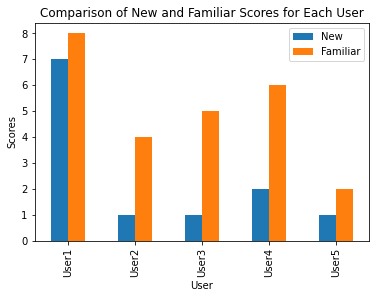

In [41]:
# Create a bar plot for 'New' and 'Familiar' scores
df.groupby('User')[['New', 'Familiar']].sum().plot(kind='bar')

# Add a title
plt.title('Comparison of New and Familiar Scores for Each User')

# Add y label
plt.ylabel('Scores')

# Display the plot
plt.show()


In [44]:
average_scores = df.groupby('User')[['New', 'Familiar']].mean()
print(average_scores)



       New  Familiar
User                
User1  3.5       4.0
User2  0.5       2.0
User3  0.5       2.5
User4  1.0       3.0
User5  0.5       1.0


## Next Steps

I've highlighted some potential areas of improvement which could indeed increase the novelty and effectiveness of the recommendations.

**Leveraging user behavior:** By tracking users' interaction with recipes (for example, which recipes they spend the most time on, which ones they like or dislike), the model could learn more about individual preferences and tailor its suggestions accordingly.

**Expanding keyword values:** This could help increase the specificity of the model. For instance, keywords could include not only ingredients but also cooking methods, occasions, meal types (breakfast, dinner, snack, etc.), diet types (vegetarian, vegan, paleo, etc.), and so on.

**Enriching feature set:** Adding more features like cuisine type could indeed offer a different angle for classification. More detailed data could enhance the model's ability to understand the nuances of user preference.

Nevertheless with atleast 2 hits per segment being a promising result for a beta test. Continuous iteration and incorporating user feedback will help further refine the models and hopefully improve their performance over time.